In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
import csv
import skfuzzy as fuzz
from sklearn.cluster import KMeans

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [12]:
#Get data from all pacients

# pacients = ["01/01", "02/02", "03/03", "04/04", "05/05", "06/06", "07/07", "08/08"]
pacients = ["01/01"]

velocities = ["17"]

repetitions = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10"]


column_x = []
column_y = []
column_z = []

for pacient in pacients:
    for velocity in velocities:
        for index in repetitions:
            data_location = './../data/'+pacient+'_Gang_'+ velocity + '_' + index + '.csv'
            read_data = pd.read_csv(data_location, engine='python', sep=None)
            new_data = pd.DataFrame(read_data)
#             column1_x = new_data.loc[:,'RT Hand Accel Earth X,mG']
#             column1_y = new_data.loc[:,'RT Hand Accel Earth Y,mG']
#             column1_z = new_data.loc[:,'RT Hand Accel Earth Z,mG']
#             column2_x = new_data.loc[:,'RT Foot Accel Earth X,mG']
#             column2_y = new_data.loc[:,'RT Foot Accel Earth Y,mG']
#             column2_z = new_data.loc[:,'RT Foot Accel Earth Z,mG']
            
            column1_x = new_data.loc[:,'Upper spine Accel Earth X,mG']
            column1_y = new_data.loc[:,'Upper spine Accel Earth Y,mG']
            column1_z = new_data.loc[:,'Upper spine Accel Earth Z,mG']
            column2_x = new_data.loc[:,'RT Foot Accel Earth X,mG']
            column2_y = new_data.loc[:,'RT Foot Accel Earth Y,mG']
            column2_z = new_data.loc[:,'RT Foot Accel Earth Z,mG']
            
            column_x.append(pd.DataFrame(column1_x.values))
            column_x.append(pd.DataFrame(column2_x.values))
            
            column_y.append(pd.DataFrame(column1_y.values))
            column_y.append(pd.DataFrame(column2_y.values))
            
            column_z.append(pd.DataFrame(column1_z.values))
            column_z.append(pd.DataFrame(column2_z.values))
                        
total = []       
result = pd.concat(column_x)
total.append(pd.DataFrame(result))
result = pd.concat(column_y)
total.append(pd.DataFrame(result))
result = pd.concat(column_z)
total.append(pd.DataFrame(result))

total = pd.concat(total, axis=1, join='inner')
total

,0,0,0
0,-13.533500,9.311770,-7.281380
1,-8.392850,-1.238510,-1.384060
2,-5.287500,-0.825674,4.152190
3,5.161600,4.051920,-4.723870
4,0.608482,0.275225,0.150442
5,-0.734375,-1.192640,3.580510
6,-7.301780,-0.672772,-2.196450
7,-1.405800,3.791990,0.511502
8,-3.441070,4.082500,-1.203530
9,-0.566518,-0.657481,6.649520


In [13]:
def cluster(som, n_clusters=2):
    cl_labels = KMeans(n_clusters=n_clusters).fit(
        som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
    )
    return cl_labels

In [ ]:
data = total.values
mapsize = [50,50]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice="rect", normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
som.train(n_job=4, verbose='debug', train_rough_len=1000)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 18520 and data dimension is 3
      > map size is 50,50
      > array size in log10 scale is 8.142702245737615
      > number of jobs in parallel: 4
 -------------------------------------------------------------

 pca_linear_initialization took: 0.067000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 1000

 find_bmu took: 1.124000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 1 ---> elapsed time:  1.353000, quantization error: 0.478194

 find_bmu took: 1.025000 seconds
 update_codebook_voronoi took: 0.020000 seconds
 epoch: 2 ---> elapsed time:  1.297000, quantization error: 0.323731

 find_bmu took: 1.526000 seconds
 update_codebook_voronoi took: 0.022000 seconds
 epoch: 3 ---> elapsed time:  1.803000, quantization error: 0.327142

 find_bmu took: 1.125000 seconds
 update_codebook_voronoi took: 0.029000 seconds
 epoch: 4 ---

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


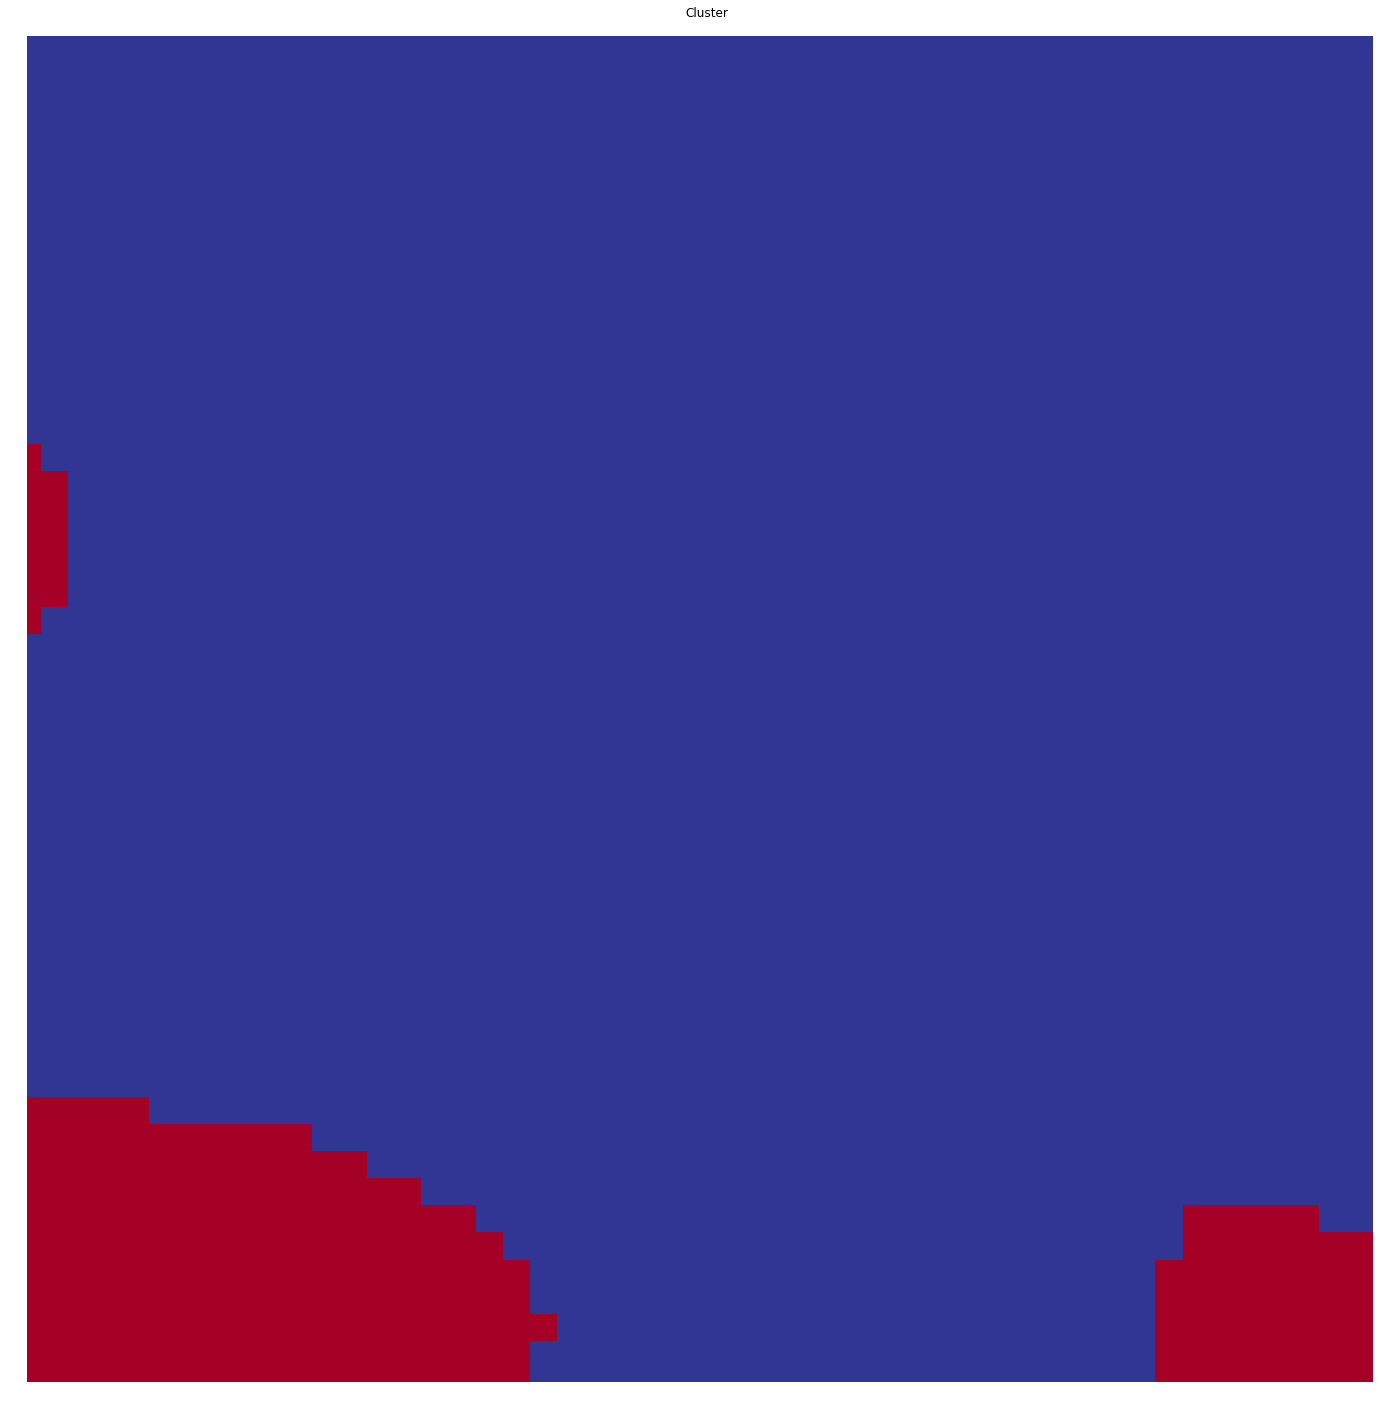

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fc0b5d21128>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fc0b5d21128>
Setting pcolormesh
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


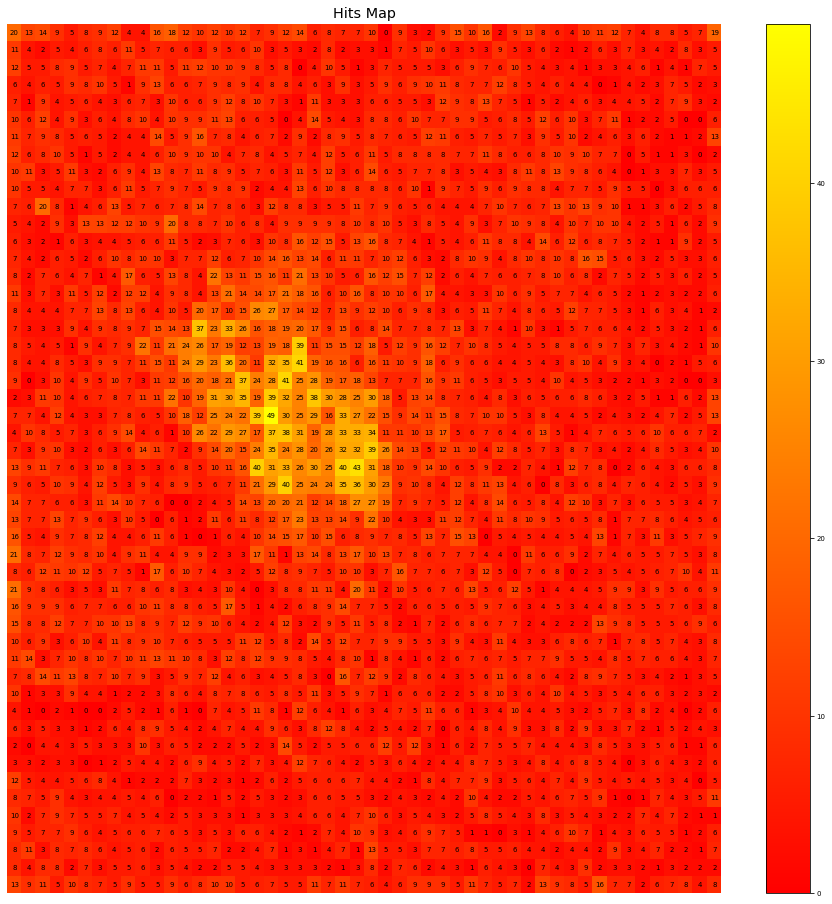

In [10]:
# Visualization Plots
som.cluster(2)
vis  = sompy.mapview.View2DPacked(5, 5, 'Cluster',text_size=12)  
kmeans_labels = cluster(som, n_clusters=2)
som.cluster_labels = kmeans_labels.labels_

vis.show(som, what='cluster')

from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


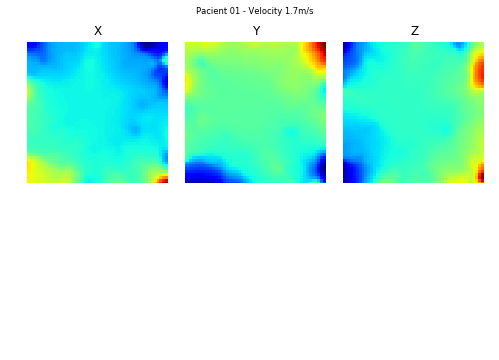

In [11]:
#Generate maps
som.component_names = ["X", "Y", "Z"]
v  = sompy.mapview.View2DPacked(10, 10, 'Pacient 01 - Velocity 1.7m/s \n\n',text_size=10)
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=3) #which_dim='all' default